In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [3]:
def cat_name(x):
    if x=='NORMAL GALAXIES: DIFFUSE EMISSION' or x=='NORMAL GALAXIES: X-RAY POPULATIONS':
        return 'NORMAL GALAXIES'
    elif x=='NORMAL STARS AND WD':
        return 'STARS AND WD'
    else:
        return x

In [4]:
def find_word(x,word):
    if word in x:
        return True
    else:
        return False

In [5]:
df=pd.read_csv('cycle_01.csv')
df2=pd.read_csv('all_large.csv')

In [6]:
df2=df2.drop(['Type','Unnamed: 0'],1)

In [7]:
df2.rename(columns={'Time (ks)':'Time'},inplace=True)
df2=df2[df2['Category']!='Category']
df2['Year']=map(lambda x: '20'+x[0:2], df2['Proposal Number'])
df2=df2.fillna('Nan')
df2.Category=map(lambda x: x.strip(),df2.Category)
df2.replace('Nan',0)
df2.Category=df2.Category.apply(cat_name)
df2['Time']=df2['Time'].apply(float)
df2['Year']=df2['Year'].apply(float)
df2['PI Name'] = map(lambda x: x.upper().split()[-1], df2['PI Name'])


In [8]:
df2[df2['Proposal Number']=='03600940']

,Proposal Number,Category,PI Name,Time,Title,Year
175,03600940,NORMAL GALAXIES,BAGANOFF,518.5,MONITORING THE EXTREME X-RAY FLARING OF SAGITT...,2003.0


In [9]:
for i in range(16):
    dfi=pd.read_csv('cycle_%02i.csv'%(i+2))
    dfi.rename(columns={'Time (ks)':'Time'},inplace=True)
    dfi['Year']=int('20'+'%02i'%(i+2))
    df=pd.concat([df,dfi])

In [10]:
df=df.drop(['Type','Unnamed: 0'],1)
df=df[df['Category']!='Category']
df=df.set_index(np.arange(3662))
df=df.fillna('Nan')
df.Category=map(lambda x: x.strip(),df.Category)
df.replace('Nan',0)
df.Category=df.Category.apply(cat_name)
df['Time']=df['Time'].apply(float)
df['PI Name'] = map(lambda x: x.upper().split()[-1], df['PI Name'])
df['Title'] = map(lambda x: x.upper(), df['Title'])

In [11]:
def str_year(year):
    return '%i' % year

In [12]:
dff=pd.concat([df,df2])
dff=dff.set_index(np.arange(3849))
dff['Year']=dff['Year']-2.
dff['Year']=dff['Year'].apply(str_year)
print dff.shape
dff=dff.drop_duplicates(subset='Proposal Number',keep='first')
print dff.shape

(3849, 6)
(3786, 6)


In [13]:
dff[map(lambda x: find_word(x,'EARTH'), dff.Title)]

,Category,PI Name,Proposal Number,Time,Title,Year
633,SOLAR SYSTEM,GLADSTONE,3108123,1.0,A SEARCH FOR SOFT X-RAY AURORAS ON EARTH,2001
1193,SOLAR SYSTEM,ELSNER,5100445,12.0,A SEARCH FOR SOFT X-RAY AURORAS ON EARTH,2003
2656,STARS AND WD,LISSE,12200733,40.0,CHARACTERIZING THE X-RAY RADIATION FIELD IN TH...,2010
3502,STARS AND WD,MILLER,16200348,21.0,ATMOSPHERIC HEATING IN AN IRRADIATED TRANSITIN...,2014


In [14]:
find_word(dff.Title[0],'VENUS')

True

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11322d2d0>]], dtype=object)

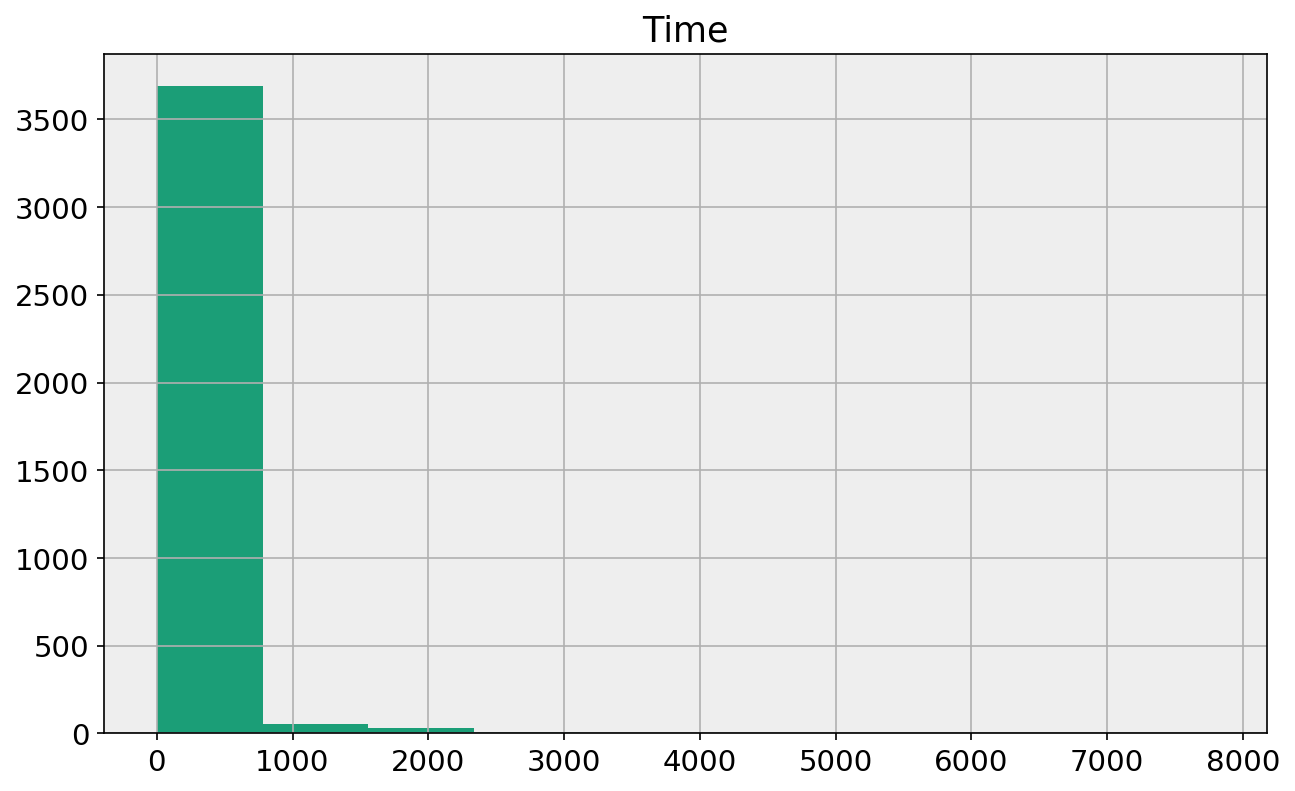

In [15]:
dff.hist('Time')

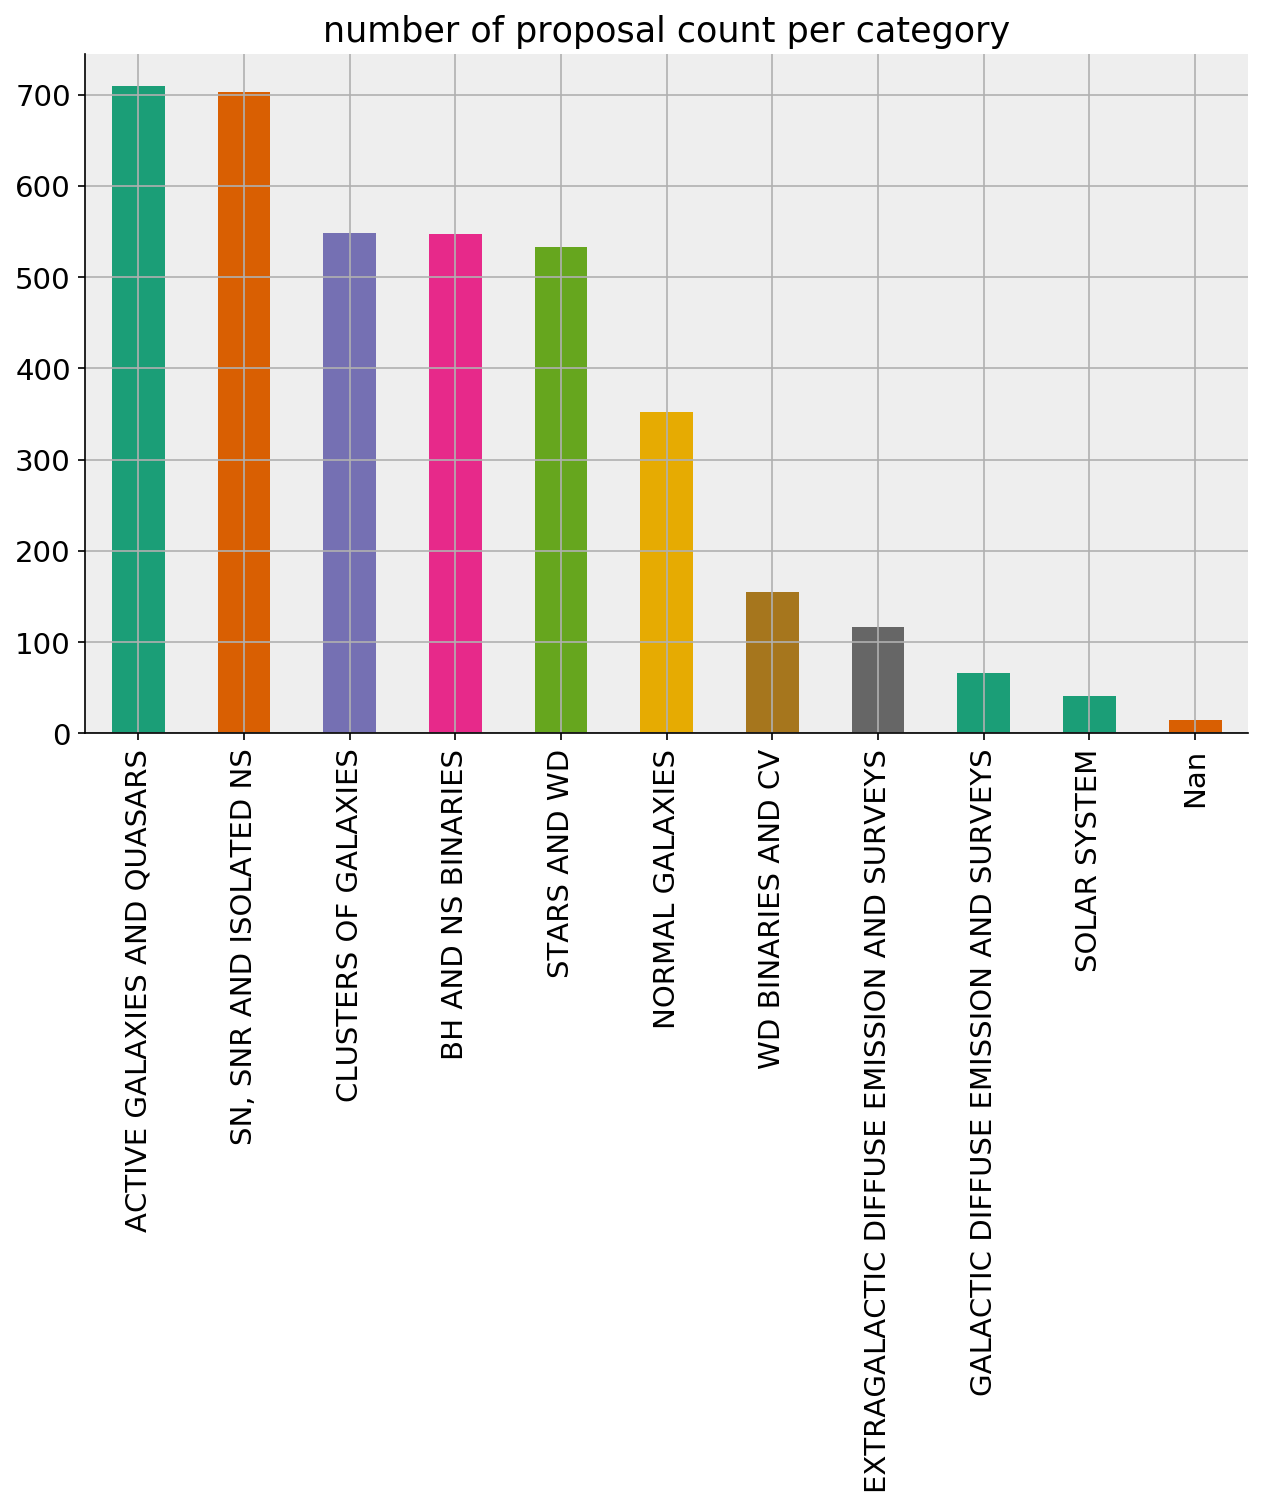

In [16]:
dff.Category.value_counts().plot(kind='bar')
plt.title('number of proposal count per category')
remove_border()

In [17]:
dff.Category[dff.Category!='Nan'].value_counts()

ACTIVE GALAXIES AND QUASARS                   709
SN, SNR AND ISOLATED NS                       703
CLUSTERS OF GALAXIES                          548
BH AND NS BINARIES                            547
STARS AND WD                                  533
NORMAL GALAXIES                               352
WD BINARIES AND CV                            155
EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS    117
GALACTIC DIFFUSE EMISSION AND SURVEYS          66
SOLAR SYSTEM                                   41
Name: Category, dtype: int64

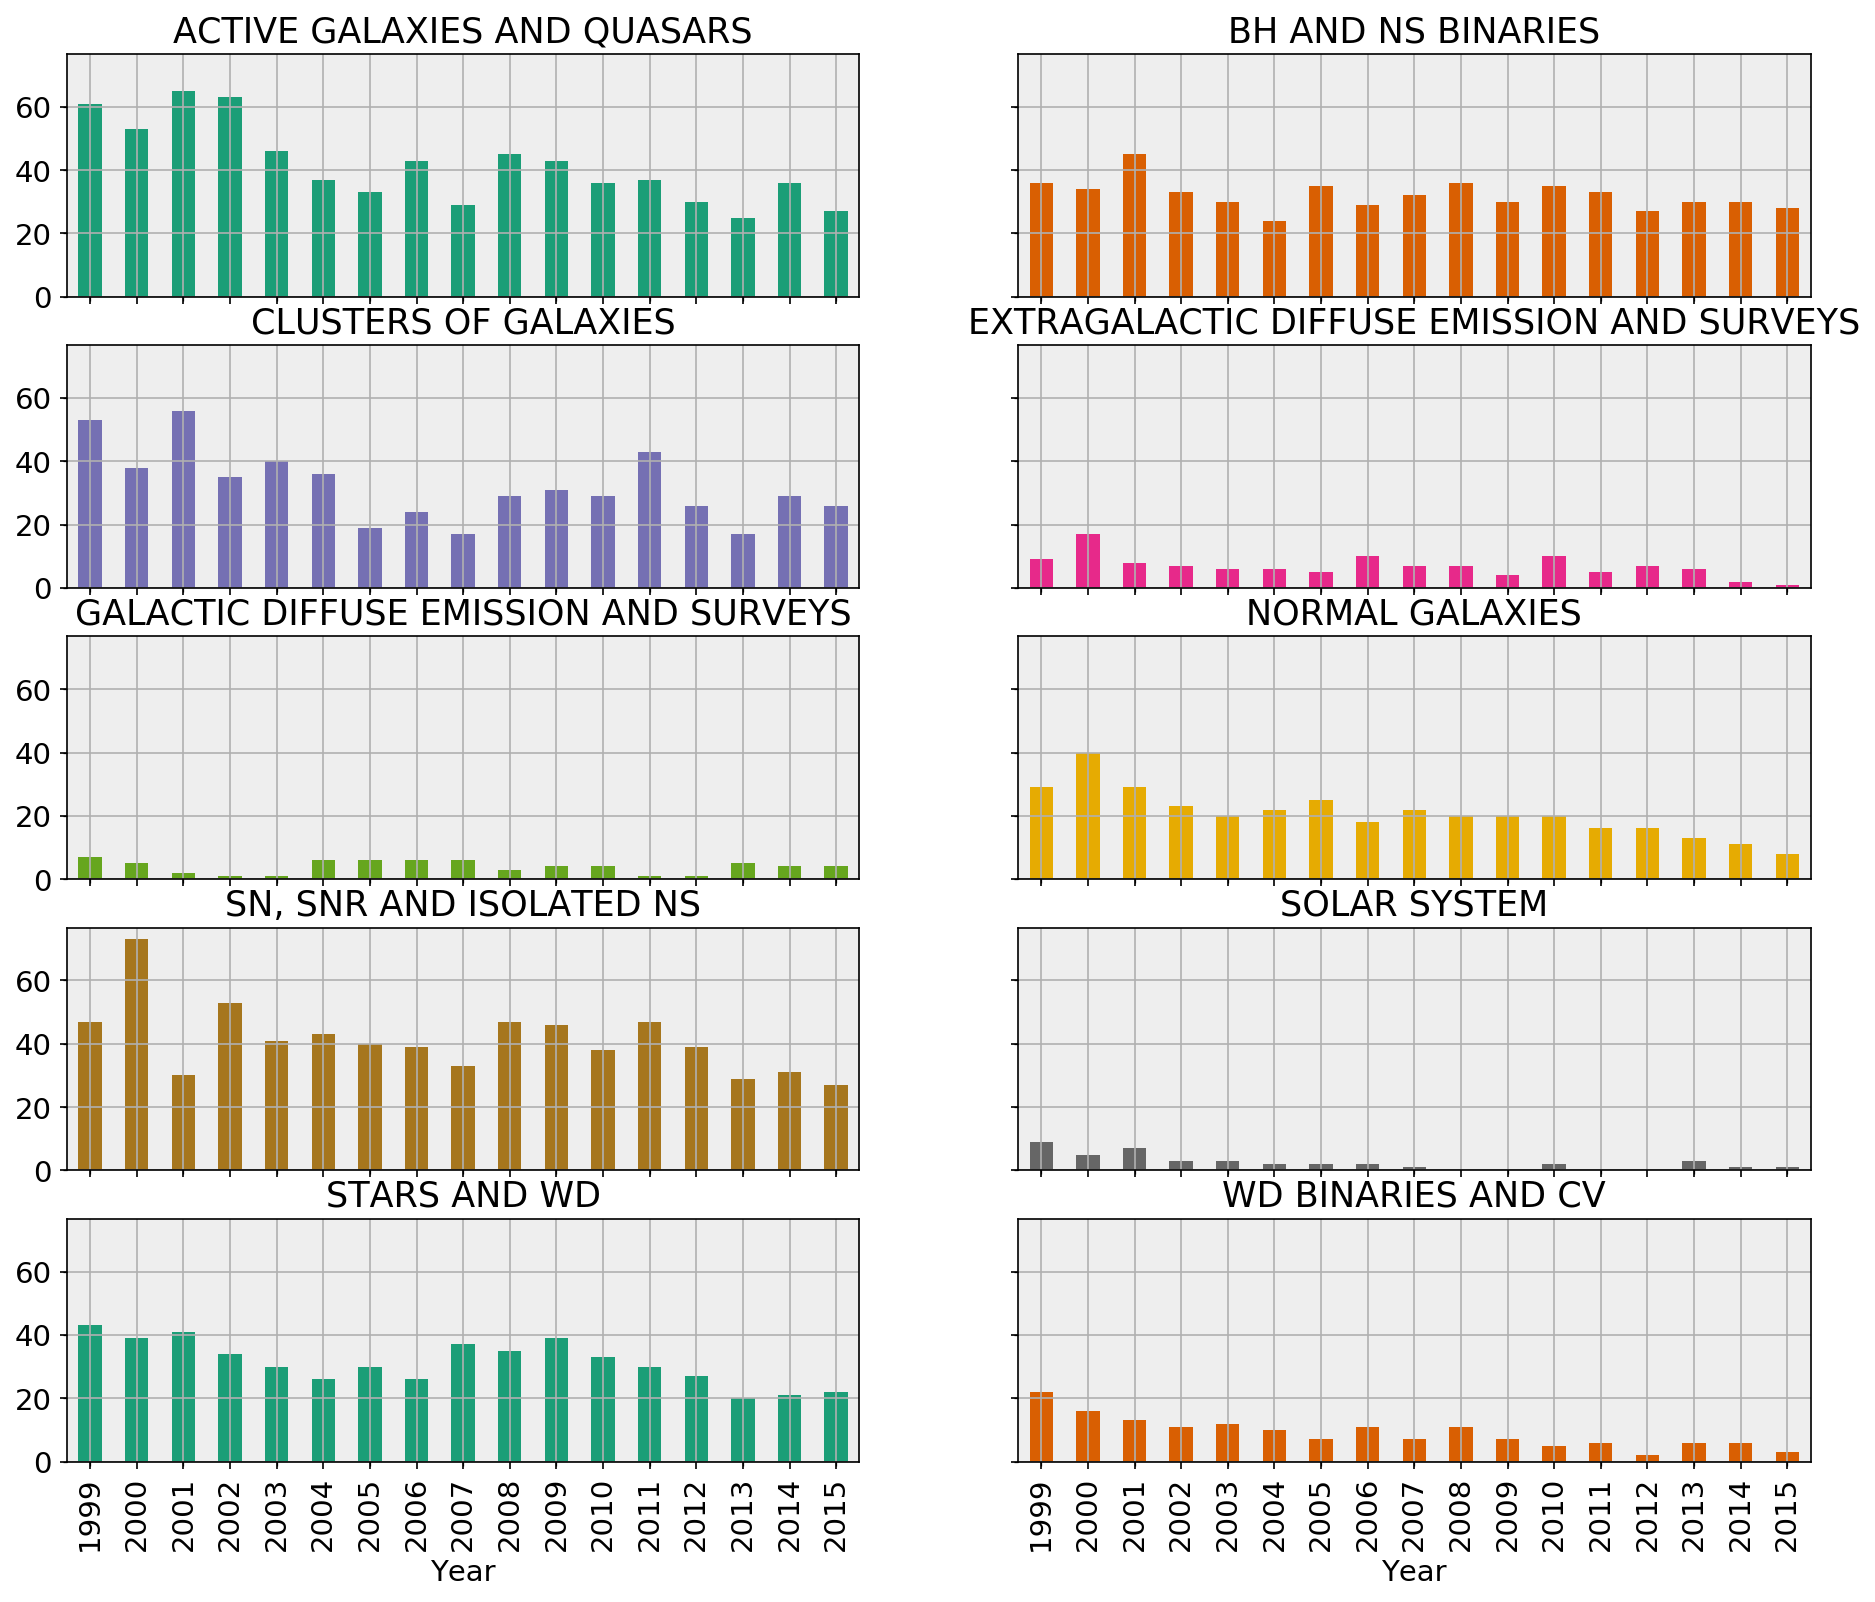

In [18]:
cat_count=dff.Category[dff.Category!='Nan'].groupby(dff['Year']).value_counts();
cat_count.unstack().plot(kind='bar',figsize=(15,15),sharey=True,subplots=True,legend=False,layout=(6,2));

In [29]:
dff['Time'].groupby(dff['Category']).apply(sum)#/df.Category.value_counts()
#df.groupby(by=['Category'])['Time']

Category
ACTIVE GALAXIES AND QUASARS                    86171.676667
BH AND NS BINARIES                             64574.620000
CLUSTERS OF GALAXIES                          106008.280000
EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS     46059.800000
GALACTIC DIFFUSE EMISSION AND SURVEYS          11449.500000
NORMAL GALAXIES                                48792.664000
Nan                                              981.000000
SN, SNR AND ISOLATED NS                       112289.620000
SOLAR SYSTEM                                    2951.150000
STARS AND WD                                   57738.440000
WD BINARIES AND CV                             14827.740000
Name: Time, dtype: float64

In [30]:
dff['Time'].groupby(dff['Year']).apply(sum)
#plt.plot(dff['Time'].groupby(dff['Year']).apply(sum))
#dff['Time'].groupby(dff['Year']).hist(bins=30,log=True);

Year
1999    46044.170000
2000    32252.010000
2001    38655.440000
2002    28166.540000
2003    33214.440000
2004    28537.370000
2005    31798.660000
2006    28034.000000
2007    30176.200000
2008    28684.666667
2009    31526.374000
2010    31466.300000
2011    44078.180000
2012    41469.800000
2013    25724.000000
2014    27395.400000
2015    24620.940000
Name: Time, dtype: float64

Text(0.5,0.98,u'log10(Time (ks))')

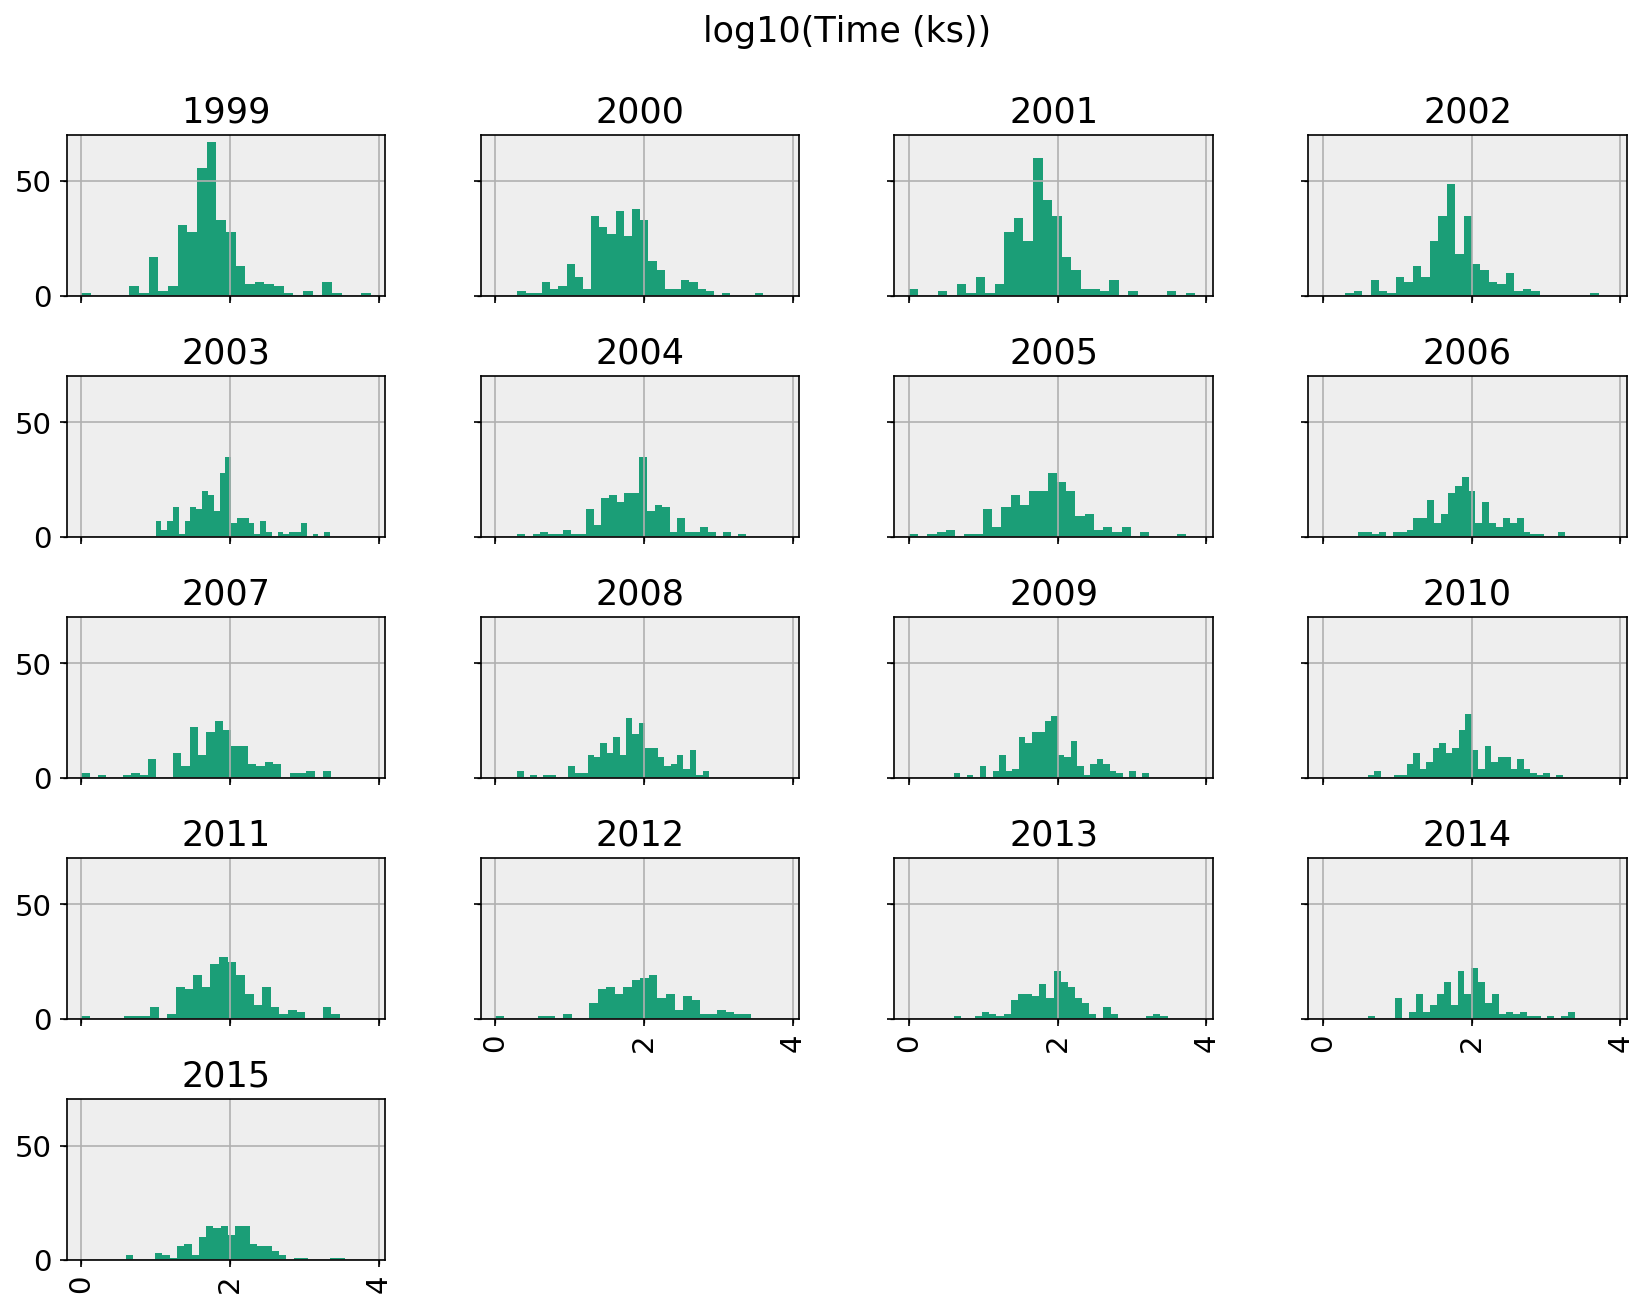

In [31]:
np.log10(dff['Time']).hist(by=dff['Year'],sharex=True,sharey=True,figsize=(13,10),bins=30);
plt.suptitle('log10(Time (ks))')

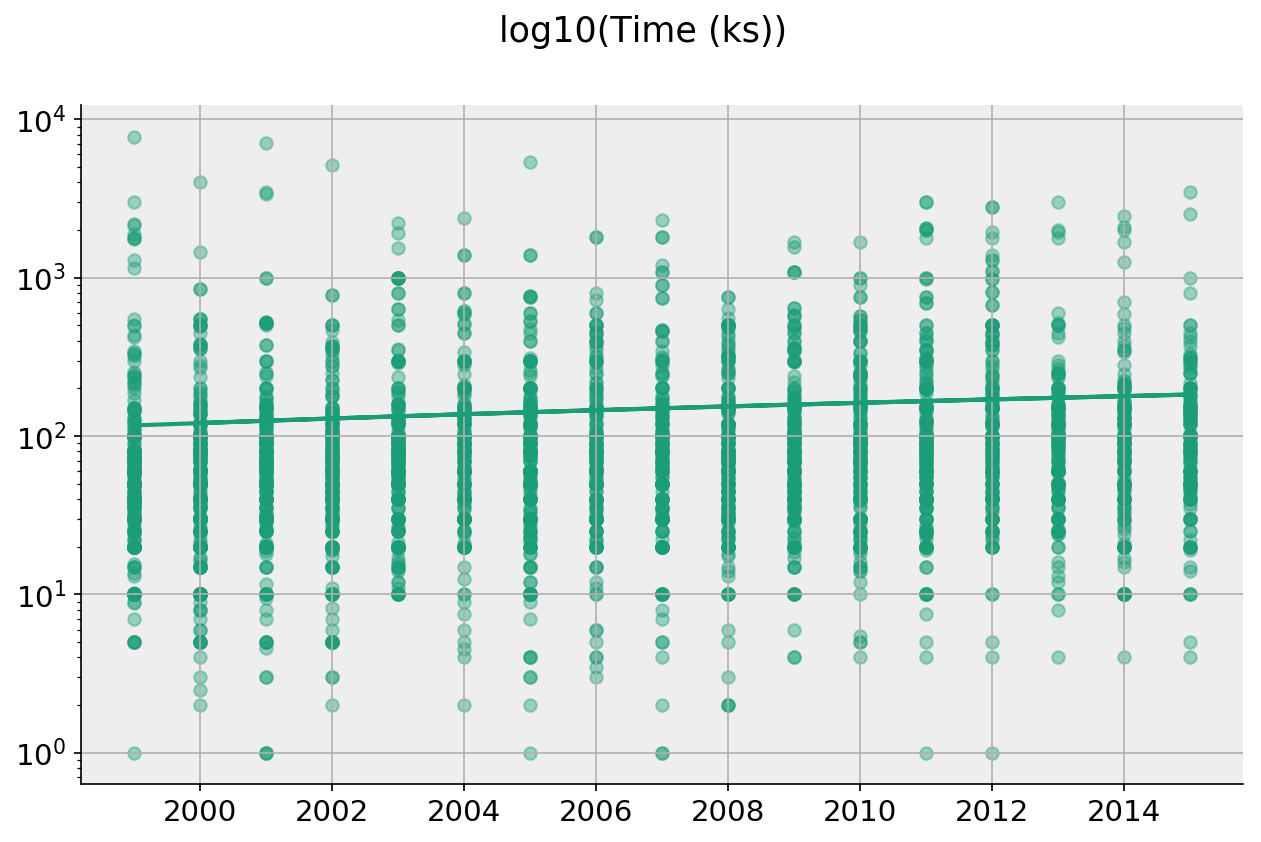

In [32]:
plt.yscale('log')
plt.suptitle('log10(Time (ks))')
x=dff['Year'].apply(float).values
y=dff['Time'].apply(float).values
plt.scatter(x,y,alpha=0.4)
z=np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
remove_border(left=True, bottom=True)

In [83]:
np.sum(dff.Time == 1)

9

In [80]:
dff[['Time','Year','PI Name','Title']].to_csv('chandra_proposal_data.csv',index=False)

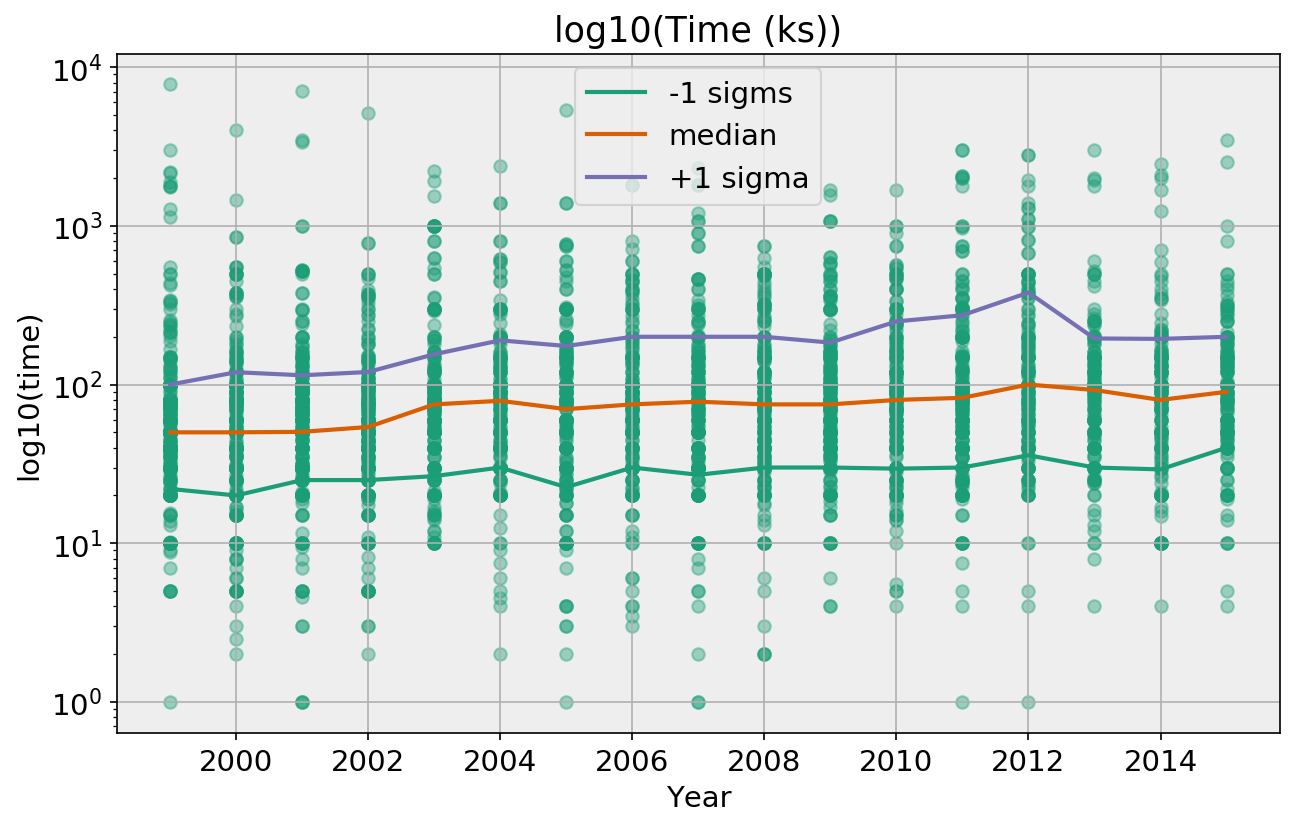

In [72]:
x=dff['Year'].apply(float).values
y=dff['Time'].apply(float).values


p16=dff['Time'].groupby(dff['Year']).apply(np.percentile,16)
p50=dff['Time'].groupby(dff['Year']).apply(np.percentile,50)
p84=dff['Time'].groupby(dff['Year']).apply(np.percentile,84)
plt.scatter(x,y,alpha=0.4)
plt.plot(map(float,p16.index.values),p16.values,label='-1 sigms')
plt.plot(map(float,p50.index.values),p50,label='median')
plt.plot(map(float,p84.index.values),p84,label='+1 sigma')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel('log10(time)')
plt.title('log10(Time (ks))')
plt.legend(loc='best')

In [73]:
dff

,Category,PI Name,Proposal Number,Time,Title,Year
0,SOLAR SYSTEM,DENNERL,1100297,24.30,VENUS AND MARS: THE CLOSEST PLANETARY ANALOGUE...,1999
1,SOLAR SYSTEM,LISSE,1100323,32.00,AXAF LOW ENERGY SPECTROSCOPY AND PHOTOMETRIC I...,1999
2,SOLAR SYSTEM,KASTNER,1100334,40.00,X-RAY IMAGING OF THE INTERACTING WINDS OF PLAN...,1999
3,SOLAR SYSTEM,SNOW,1100814,50.00,ASSESSEMENT OF INTERSTELLAR DEPLETIONS THROUGH...,1999
4,SOLAR SYSTEM,VESTRAND,1100890,65.25,SOLVING THE PUZZLE OF COMETARY X-RAY ORIGIN: O...,1999
5,SOLAR SYSTEM,RICKER,1100931,20.00,X-RAY AFTERGLOW MEASUREMENTS BY AXAF OF GAMMA-...,1999
6,SOLAR SYSTEM,PIRO,1100952,40.00,X-RAY POSITIONS AND AFTERGLOWS OF GAMMA-RAY BU...,1999
7,SOLAR SYSTEM,GARMIRE,1100045,40.30,ACIS OBSERVATION OF JUPITER AND THE GALILEAN S...,1999
8,SOLAR SYSTEM,DENNERL,1108023,36.00,X-RAY EMISSION FROM COMET 10P/BORRELLY DURING ...,1999
9,STARS AND WD,DRAKE,1200248,100.00,ACIS/HETG SPECTROSCOPY OF THE ACTIVE BINARIES ...,1999


In [70]:
map(float,p16.index.values)

[1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0]

In [43]:
dff['Time'].groupby(dff['Year']).apply(np.percentile,16)

Year
1999    22.00
2000    20.00
2001    25.00
2002    25.00
2003    26.48
2004    30.00
2005    22.56
2006    30.00
2007    27.00
2008    30.00
2009    30.00
2010    29.52
2011    30.00
2012    35.84
2013    30.00
2014    29.20
2015    40.00
Name: Time, dtype: float64

In [24]:
dff.loc[dff['PI Name']=='NANDRA']

,Category,PI Name,Proposal Number,Time,Title,Year
191,ACTIVE GALAXIES AND QUASARS,NANDRA,1700358,80.0,PROBING RELATIVISTIC OUTFLOWS IN EXTREME NLS1,1999
934,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,3900462,200.0,THE X-RAY UNIVERSE AT HIGH REDSHIFT,2001
936,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,3900608,175.0,THE SHEEP SURVEY: WHAT KIND OF OBJECTS MAKE TH...,2001
1559,ACTIVE GALAXIES AND QUASARS,NANDRA,6700612,55.0,BRINGING IN THE LAST SHEEP,2004
1607,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,6900444,1400.0,DEEP CHANDRA IMAGING OF THE EXTENDED GROTH STR...,2004
1608,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,6900602,150.0,THE SPECTRAL ENERGY DISTRIBUTIONS OF AGN: A SH...,2004
2008,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,8900627,200.0,AGN IN THE COSMIC WEB: A PROTO-CLUSTER AT Z=2.3,2006
2194,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,9900660,1800.0,THE EVOLUTION OF FAINT AGN AT HIGH REDSHIFT,2007
3774,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,09900660,1800.0,The Evolution of Faint AGN at High Redshift,2007
3803,EXTRAGALACTIC DIFFUSE EMISSION AND SURVEYS,NANDRA,06900444,1400.0,Deep Chandra Imaging of the Extended Groth Str...,2004


In [28]:
zip(dff['PI Name'].value_counts().index,dff['PI Name'].value_counts().values)

[('GARMIRE', 172),
 ('MURRAY', 150),
 ('CANIZARES', 64),
 ('PREDEHL', 58),
 ('POOLEY', 38),
 ('FABIAN', 36),
 ('MILLER', 32),
 ('MENDEZ', 29),
 ('BRANDT', 28),
 ('SARAZIN', 27),
 ('REYNOLDS', 26),
 ('CHAKRABARTY', 26),
 ('KASPI', 26),
 ('HUGHES', 25),
 ('SLANE', 23),
 ('JONKER', 23),
 ('TOWNSLEY', 23),
 ('HALPERN', 22),
 ('WIJNANDS', 22),
 ('BURROWS', 21),
 ('WANG', 21),
 ('JONES', 20),
 ('IRWIN', 19),
 ('SMITH', 19),
 ('KAASTRA', 19),
 ('HARDCASTLE', 19),
 ('HARRIS', 19),
 ('ALLEN', 18),
 ('TOMSICK', 18),
 ('LEWIN', 18),
 ('PAVLOV', 18),
 ('FABBIANO', 17),
 ('AYRES', 16),
 ('FORMAN', 16),
 ('CORBEL', 16),
 ('KAARET', 16),
 ('ROMANI', 15),
 ('NAN', 15),
 ('SKINNER', 15),
 ('KRAFT', 15),
 ('ROBERTS', 15),
 ('KULKARNI', 15),
 ('GARCIA', 14),
 ('GRINDLAY', 14),
 ('KASTNER', 14),
 ('HOMAN', 13),
 ('DEGENAAR', 13),
 ('VIKHLININ', 13),
 ('GUEDEL', 13),
 ('MARKEVITCH', 13),
 ('CORCORAN', 13),
 ('SANDERS', 13),
 ('CALIBRATION', 12),
 ('LEE', 12),
 ('ZEZAS', 12),
 ('EVANS', 12),
 ('BROWN', 12),

In [27]:
dff[dff['PI Name']=='CHAKRABARTY']

,Category,PI Name,Proposal Number,Time,Title,Year
403,BH AND NS BINARIES,CHAKRABARTY,2400927,5.0,WHERE IS OAO 1657-415?,2000
711,BH AND NS BINARIES,CHAKRABARTY,3400979,60.0,RESOLVING THE SOFT EXCESS IN 4U 1850-087,2001
725,BH AND NS BINARIES,CHAKRABARTY,3408100,20.0,SPECTROSCOPY OF THE HIGH-LATITUDE ACCRETING MI...,2001
1012,BH AND NS BINARIES,CHAKRABARTY,4400876,7.0,SNAPSHOT SURVEY OF FOUR LMXBS,2002
1262,BH AND NS BINARIES,CHAKRABARTY,5400958,50.0,HETGS SPECTROSCOPY OF THE ULTRACOMPACT X-RAY D...,2003
1469,BH AND NS BINARIES,CHAKRABARTY,6400892,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2004
1682,BH AND NS BINARIES,CHAKRABARTY,7400737,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2005
1873,BH AND NS BINARIES,CHAKRABARTY,8400666,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2006
2085,BH AND NS BINARIES,CHAKRABARTY,9400544,4.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2007
2257,BH AND NS BINARIES,CHAKRABARTY,10400234,3.0,PRECISE LOCALIZATION OF NEUTRON STAR SOFT X-RA...,2008


In [740]:
## the total time committed to the projects